### NOTEBOOK RUNTIME(Runtime->Run all/Ctrl+F9) : Around 20 minutes(very big dataset)

## Abstract

Counter-Strike: Global Offensive (CS:GO) is a multiplayer tactical first-person shooter developed by Valve and Hidden Path Entertainment. Counter-Strike: Global Offensive is a tactical shooter that emphasizes teamwork, strategy, and gunplay. Winning a game requires extensive teamwork, as well as personal economy management.

CS:GO’s primary game mode for its casual and competitive queues is bomb defusal. Each round, a team of terrorists must take the bomb and plant it on one of two bomb sites. The team of counter-terrorists are tasked with stopping them from planting, or defusing the bomb after it’s planted. If the bomb explodes, or if the terrorists kill all the CTs, then they win the round. If the CTs kill all the terrorists before the bomb is planted, or defuse the bomb after its planted, then they win. A CT can defuse the bomb even if other terrorists are still alive. If the bomb isn’t planted and players from both sides are alive at the end of a round, the CTs win that round.

At the beginning of the round, each player has to buy their equipment, consisting of weapons, armor, and grenades. There are five categories of purchasable weaponry: rifles, submachine guns, "heavy" weaponry (light machine guns and shotguns), pistols, and grenades. Players can choose between full or half armor, a handful of grenades, and several weapons. Players will earn money each round, and can earn additional money for killing players and fulfilling objectives like planting or defusing the bomb.

## Installing all the required packages

"pip install" is a command used in Python to install packages or libraries from the PyPI (Python Package Index) repository. It is one of the most common ways to add external code to your Python projects.

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 7.6 MB/s eta 0:00:00


## Importing all the libararies required

The "import" keyword in Python is used to bring in external modules or packages into your Python code. The "from" keyword is used to import specific objects or functions from a module, rather than importing the whole module.

In [2]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from math import ceil
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import sklearn
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")

sns.set(rc={"figure.figsize": (16, 8)})

pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)

## Initializing h2o locally and starting

This below code initializes an H2O cluster by setting the minimum memory size to 6GB or 50% of the available virtual memory, whichever is smaller. It also sets the runtime to 222 seconds and starts the H2O server on a random port between 5555 and 55555. 

The below code then attempts to start the H2O cluster with the specified settings, and if it fails, it logs the error and shuts down the cluster.

In [3]:
h2o.init()
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0uhe5c6c
  JVM stdout: /tmp/tmp0uhe5c6c/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0uhe5c6c/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_ass75c
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [5]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [6]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:14046..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcu6xab70
  JVM stdout: /tmp/tmpcu6xab70/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcu6xab70/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:14046
Connecting to H2O server at http://127.0.0.1:14046 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_s6hrfj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Exploratory Data Analysis (EDA)

### Reading the Dataset and understanding

This Python code imports the "drive" module from the "google.colab" package, which allows the user to connect and mount their Google Drive to their Colab environment. The second line mounts the user's Google Drive to the directory "/content/drive" in the Colab environment, allowing the user to access files from their Google Drive within their Colab notebooks.

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("https://raw.githubusercontent.com/7srik/Auto_ML_CSGO_Round_Winner/main/csgo_round_snapshots.csv")
#data2=pd.read_csv("/content/drive/MyDrive/DS CSV/csgo_round_snapshots.csv")

data.name = "data"
data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,2,0,0,0,0,0,0,CT
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,2,0,0,0,0,0,0,CT
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,CT
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,0,0,0,0,0,0,0,CT


"info()" method provides a summary of the data in the dataframe, including the number of non-null values in each column, the data type of each column, and the amount of memory used by the dataframe. This information can be useful for understanding the structure and contents of a dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  int64  
 2   t_score                       122410 non-null  int64  
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  int64  
 6   t_health                      122410 non-null  int64  
 7   ct_armor                      122410 non-null  int64  
 8   t_armor                       122410 non-null  int64  
 9   ct_money                      122410 non-null  int64  
 10  t_money                       122410 non-null  int64  
 11  ct_helmets                    122410 non-null  int64  
 12  t_helmets                     122410 non-nul

In [10]:
data.isnull().sum()  # Checking for any null values in the dataset, as we have no null values - we are good to go.

time_left                       0
ct_score                        0
t_score                         0
map                             0
bomb_planted                    0
ct_health                       0
t_health                        0
ct_armor                        0
t_armor                         0
ct_money                        0
t_money                         0
ct_helmets                      0
t_helmets                       0
ct_defuse_kits                  0
ct_players_alive                0
t_players_alive                 0
ct_weapon_ak47                  0
t_weapon_ak47                   0
ct_weapon_aug                   0
t_weapon_aug                    0
ct_weapon_awp                   0
t_weapon_awp                    0
ct_weapon_bizon                 0
t_weapon_bizon                  0
ct_weapon_cz75auto              0
t_weapon_cz75auto               0
ct_weapon_elite                 0
t_weapon_elite                  0
ct_weapon_famas                 0
t_weapon_famas

In [11]:
data.shape  # Shape of the dataframe - Here, we have 122410 samples of data with 97 predictors

(122410, 97)

In [12]:
columns = list(data.columns)
print(columns)  # Name of all predictors and result

['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon', 'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas', 'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar', 't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd', 'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9', 'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver', 't_w

In [13]:
data.describe()  # Statistical description of our dataset

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [14]:
data.corr().abs().unstack().sort_values(ascending=False, kind="quicksort").drop_duplicates().head()
#checking correlation between variables

time_left               time_left              1.000000
ct_health               ct_players_alive       0.971630
t_players_alive         t_health               0.955859
t_armor                 t_helmets              0.877626
t_grenade_smokegrenade  t_grenade_flashbang    0.831862
dtype: float64

### Changing the values of round_winner from CT or T to 0 or 1

This code creates a LabelEncoder object called "encoder", which is used to transform the values in the "round_winner" column of a Pandas dataframe called "data" into numerical labels. The second line applies the encoder to the "round_winner" column of the dataframe, replacing the original values with their corresponding numerical labels. The third line creates a dictionary called "winner_mappings" that maps each numerical label to its original string value, based on the classes identified by the encoder. This code is commonly used for preparing categorical data for machine learning models that require numerical inputs.

In [15]:
encoder = LabelEncoder()
data['round_winner'] = encoder.fit_transform(data['round_winner'])
winner_mappings = {index: label for index, label in enumerate(encoder.classes_)}

### Assigning each map an integer value,

This code creates a LabelEncoder object called "encoder", which is used to transform the values in the "map" column of a Pandas dataframe called "data" into numerical labels. The second line applies the encoder to the "map" column of the dataframe, replacing the original values with their corresponding numerical labels. The third line creates a dictionary called "map_mappings" that maps each numerical label to its original string value, based on the classes identified by the encoder. 

In [16]:
encoder = LabelEncoder()

data['map'] = encoder.fit_transform(data['map'])
map_mappings = {index: label for index, label in enumerate(encoder.classes_)}

### Changing the values of bomb_planted from False or True to 0 or 1

This code converts the data type of the "bomb_planted" column in a Pandas dataframe called "data" from its original data type to a 16-bit integer data type using the NumPy library. This type of conversion can be useful for reducing the memory usage of large datasets that contain numeric data, as 16-bit integers require less memory than the default data type used by Pandas, which is usually 32-bit or 64-bit integers.

In [17]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

## Which independent variables are significant?

### Feature selection through SelectKBest model.

This code performs feature selection for a classification problem using the SelectKBest method from the scikit-learn library. It first imports the SelectKBest method along with two score functions (chi2 and f_regression) for classification and regression respectively. The code then creates a feature matrix X_clf and a target variable y_clf, and drops the target variable from the feature matrix. Next, it replaces any infinite values in the dataset with NaN values and drops any rows containing NaN values. Finally, it creates a SelectKBest object with k=20, fits the object to the feature matrix and target variable, and selects the top 20 features based on the F-value (f_classif score function) of each feature. The selected features are stored in a new dataframe called "features_df_new", which is returned by the last line of the code. This process can be used to reduce the dimensionality of a dataset and improve the accuracy and performance of machine learning models.

In [18]:

# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression
     

# Create feature and target variable for Classification problem
X_clf=data.drop('round_winner', axis=1) # features
y_clf=data['round_winner'] # Target variable

In [19]:
#since we know no nulls are present we are trying to remove any infs if present.
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)

In [20]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
from sklearn.feature_selection import SelectKBest, f_classif
# Create and fit selector
selector = SelectKBest(f_classif, k=20)
selector.fit(X_clf, y_clf)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]

In [21]:
features_df_new.head()

,bomb_planted,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_awp,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade
0,0,500,0,0,0,0,0,5,0,0,0,0,0,0,4,0,0,0,0,0
1,0,500,400,300,0,0,1,5,0,0,0,0,0,0,4,0,0,0,0,0
2,0,391,294,200,0,0,1,4,0,0,0,0,0,0,4,0,0,0,0,0
3,0,391,294,200,0,0,1,4,0,0,0,0,0,0,4,0,0,0,0,0
4,0,500,192,0,0,0,1,5,0,0,0,0,0,0,4,0,0,0,0,0


### Indentifying predictor Significance for the SelectKBest model.



This code uses the Ordinary Least Squares (OLS) method from the statsmodels library to build a linear regression model with the target variable 'round_winner' and the feature matrix 'features_df_new'. The OLS method estimates the coefficients of the linear regression model that minimize the sum of squared residuals between the predicted and actual values. The code fits the model using the fit() method and displays a summary of the model's statistics using the summary() method. The summary includes the coefficient estimates, standard errors, t-values, p-values, and other statistics for each predictor variable in the model. The p-values can be used to assess the statistical significance of each predictor variable and to determine whether to include or exclude it from the model. Overall, this code is used for statistical modeling and analysis of linear regression.

In [22]:
#Using OLS for p value
import statsmodels.api as sm

model = sm.OLS(data['round_winner'],features_df_new ).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           round_winner   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                          1.083e+04
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        04:18:01   Log-Likelihood:                         -70111.
No. Observations:              122410   AIC:                                  1.403e+05
Df Residuals:                  122390   BIC:                                  1.405e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bomb_planted                     0.3943      0.004     96.686      0.000       0.386       0.402
ct_health                       -0.0002   4.01e-05     -5.244      0.000      -0.000      -0.000
ct_armor                        -0.0008   1.33e-05    -58.638      0.000      -0.001      -0.001
t_armor                          0.0010   1.64e-05     58.613      0.000       0.001       0.001
ct_helmets                      -0.0145      0.001    -11.139      0.000      -0.017      -0.012
t_helmets                        0.0469      0.002     24.667      0.000       0.043       0.051
ct_defuse_kits                  -0.0105      0.001     -7.230      0.000      -0.013      -0.008
ct_players_alive                 0.1115      0.004     26.934      0.000       0.103       0.120
ct_weapon_ak47                  -0.0193      0.002     -7.915      0.000      -0.024      -0.015
t_weapon_ak47                    0.0268      0.002     16.502      0.000       0.024       0.030
ct_weapon_awp                   -0.0420      0.002    -18.407      0.000      -0.046      -0.038
ct_weapon_m4a4                  -0.0297      0.002    -19.767      0.000      -0.033      -0.027
ct_weapon_sg553                 -0.0274      0.003    -10.685      0.000      -0.032      -0.022
t_weapon_sg553                   0.0367      0.002     21.596      0.000       0.033       0.040
ct_weapon_usps                   0.0060      0.001      5.438      0.000       0.004       0.008
ct_grenade_hegrenade             0.0018      0.002      1.082      0.279      -0.001       0.005
ct_grenade_flashbang            -0.0097      0.002     -6.384      0.000      -0.013      -0.007
t_grenade_flashbang             -0.0417      0.001    -34.189      0.000      -0.044      -0.039
ct_grenade_smokegrenade         -0.0030      0.001     -2.008      0.045      -0.006   -7.19e-05
ct_grenade_incendiarygrenade     0.0139      0.002      8.583      0.000       0.011       0.017
==============================================================================
Omnibus:                    25502.297   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4914.285
Skew:                          -0.002   Prob(JB):                         0.00
Kurtosis:                       2.018   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.3e+03. This might indicate that there are
stron

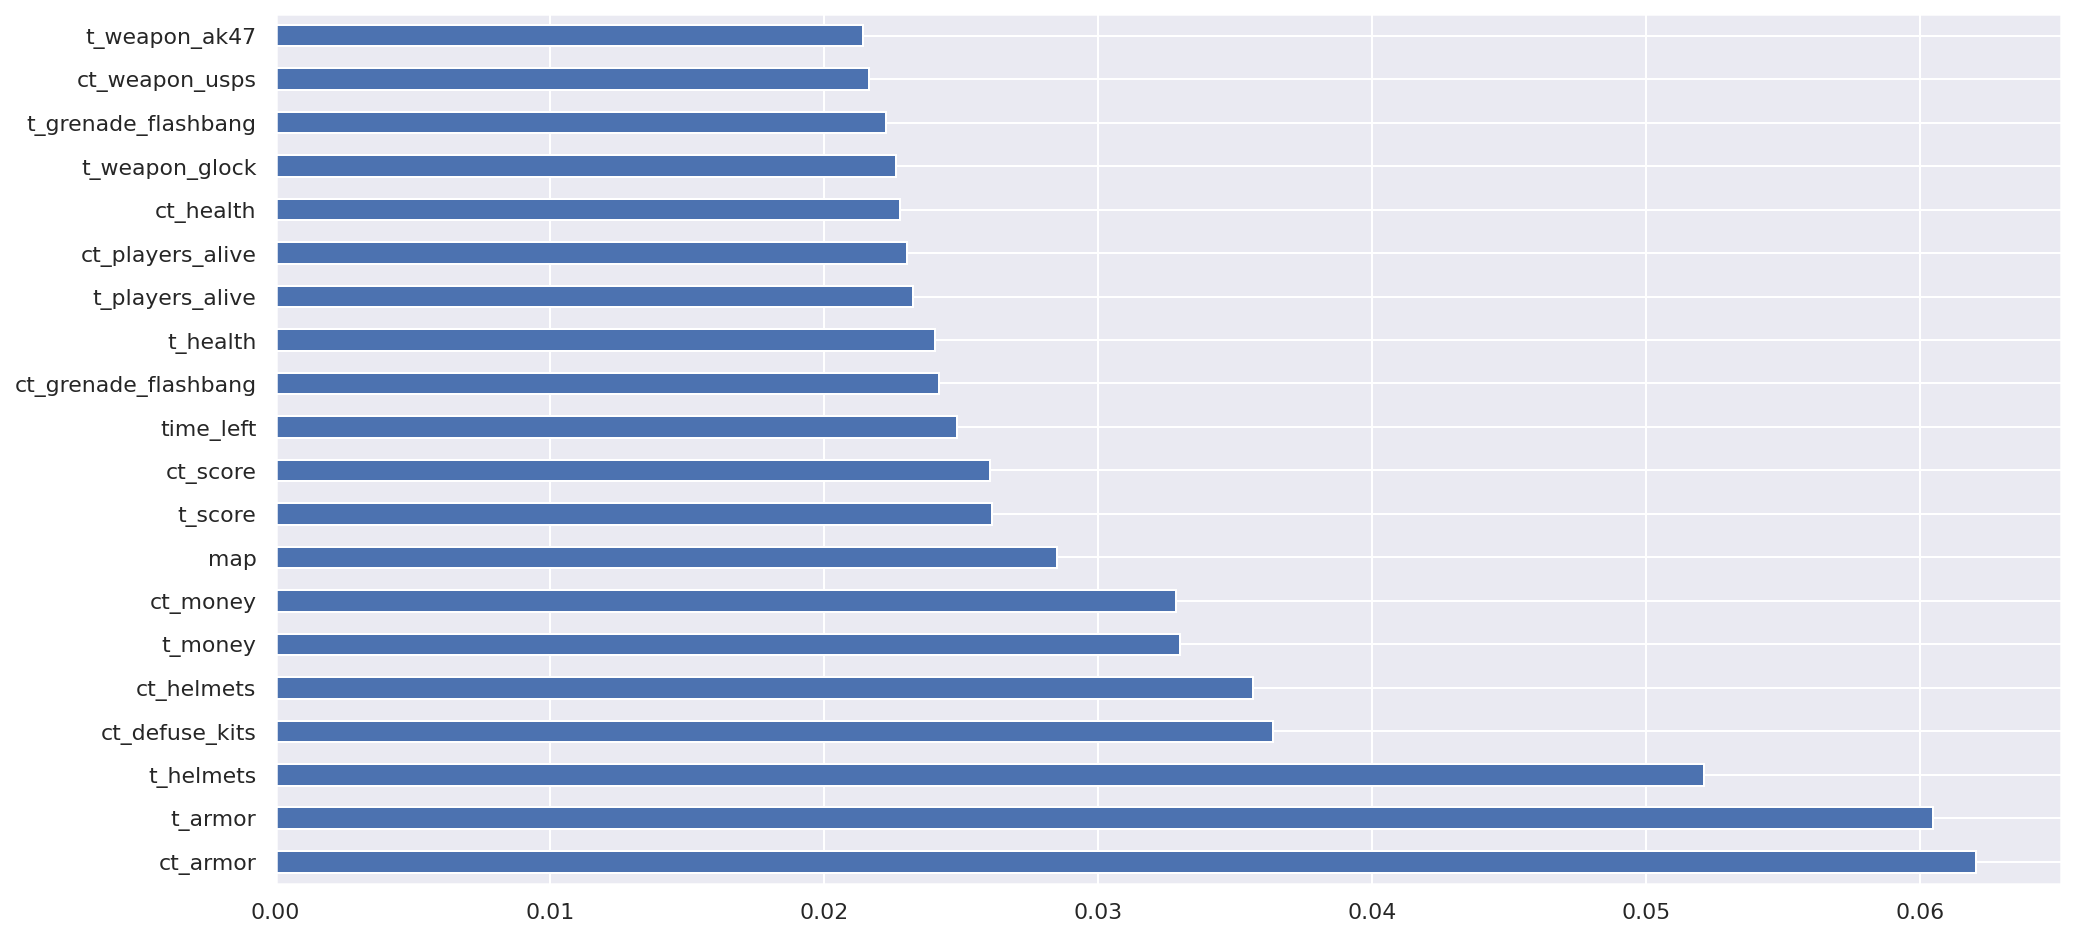

In [23]:
y = data['round_winner']
x = data.drop('round_winner', axis=1)
model = ExtraTreesClassifier()
model.fit(x,y)
#print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

By using SelectKbest method we got above variables as predictable variables.

## Importing our dataset with H2O.

This code uses the H2O library to convert a Pandas dataframe 'data' into an H2O dataframe 'df', which is used for automatic machine learning (AutoML) tasks. The H2OFrame() function converts the Pandas dataframe into an H2O dataframe format. The df.types function displays the data types of each column in the H2O dataframe, while the df.describe() function provides a summary of the H2O dataframe, including count, mean, standard deviation, minimum, and maximum values for each column. Overall, this code is used for data preparation and exploratory data analysis (EDA) before running AutoML tasks on the H2O dataframe.

In [24]:
df = h2o.H2OFrame(
    data
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [25]:
df.types

{'time_left': 'real',
 'ct_score': 'int',
 't_score': 'int',
 'map': 'int',
 'bomb_planted': 'int',
 'ct_health': 'int',
 't_health': 'int',
 'ct_armor': 'int',
 't_armor': 'int',
 'ct_money': 'int',
 't_money': 'int',
 'ct_helmets': 'int',
 't_helmets': 'int',
 'ct_defuse_kits': 'int',
 'ct_players_alive': 'int',
 't_players_alive': 'int',
 'ct_weapon_ak47': 'int',
 't_weapon_ak47': 'int',
 'ct_weapon_aug': 'int',
 't_weapon_aug': 'int',
 'ct_weapon_awp': 'int',
 't_weapon_awp': 'int',
 'ct_weapon_bizon': 'int',
 't_weapon_bizon': 'int',
 'ct_weapon_cz75auto': 'int',
 't_weapon_cz75auto': 'int',
 'ct_weapon_elite': 'int',
 't_weapon_elite': 'int',
 'ct_weapon_famas': 'int',
 't_weapon_famas': 'int',
 'ct_weapon_g3sg1': 'int',
 't_weapon_g3sg1': 'int',
 'ct_weapon_galilar': 'int',
 't_weapon_galilar': 'int',
 'ct_weapon_glock': 'int',
 't_weapon_glock': 'int',
 'ct_weapon_m249': 'int',
 't_weapon_m249': 'int',
 'ct_weapon_m4a1s': 'int',
 't_weapon_m4a1s': 'int',
 'ct_weapon_m4a4': 'int

In [26]:
df.describe()

Rows:122410
Cols:97

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
type,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,97.88692206519077,6.709239441222127,6.7804346050159205,3.5201699207581094,0.11178825259374234,412.1065680908425,402.71450044930964,314.14212074176953,298.44466955314135,9789.023772567605,11241.0366800098,2.0539008250959916,2.773637774691611,1.6137243689241105,4.2737521444326365,4.266187402989948,0.2746017482231844,1.2439261498243608,0.13461318519728785,0.007638264847643166,0.5736949595621278,0.32119107916019923,0.0,8.169267216730659e-05,0.151989216567274,0.1060534270075974,0.004011110203414754,0.0017727309860305531,0.11013806061596275,0.004738174985703782,0.0,0.000792418920022874,0.011044849277019856,0.11030144596029737,0.006919369332570869,3.310195245486477,8.169267216730659e-06,0.0,0.06381831549709989,0.00272853525038804,1.0762356016665315,0.052732619883996405,0.007556572175475861,0.10731149415897394,0.004403235029817825,4.901560330038396e-05,0.0014622988317947881,0.0027530430520382324,0.002034147536965934,0.0019524548647986276,0.14699779429785148,0.0056449636467608855,0.0,8.169267216730659e-06,0.000980312066007679,0.00010620047381749858,0.00016338534433461317,0.00015521607711788251,0.0,5.718487051711462e-05,0.0,0.0001388775426844212,0.0007188955150722981,8.169267216730659e-06,0.2391471285025735,0.8249407728126784,0.059504942406666116,0.02043950657626011,0.04642594559268034,0.03646760885548567,0.0075565721754758605,0.0002614165509353811,0.44067478147210193,0.38086757617841666,0.061751490891267066,0.009386488032023528,3.179789232905811,0.12240013070827546,0.23697410342292305,0.2916183318356341,0.1740462380524465,0.004934237398905318,0.008120251613430274,0.028322849440405196,0.8991013806061599,0.4382566783759496,1.8531574217792668,1.8580998284453882,1.54081

## Splitting our dataset

The below code splits an H2O dataframe 'df' into three datasets, 'df_train', 'df_test', and 'df_valid', with a ratio of 0.7, 0.15, and 0.15, respectively. These three datasets will be used for training, testing, and validation purposes, respectively. The split_frame() function from the H2O library is used to split the data. The df_train dataset contains 70% of the data from the original H2O dataframe 'df'.

In [27]:
#Splitting our dataset into 3 datasets, one for training, other for testing and last one for validation purposes. (0.7,0.15,0.15 split)
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

In [28]:
df_train

time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
175,0,0,1,0,500,500,0,0,4000,4000,0,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
156.03,0,0,1,0,500,500,400,300,600,650,0,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
96.03,0,0,1,0,391,400,294,200,750,500,0,0,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
174.97,1,0,1,0,500,500,192,0,18350,10750,0,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114.97,1,0,1,0,500,500,500,0,1750,10550,5,0,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,3,0,3,0,3,0,1,0,0,0,0,0,0
94.97,1,0,1,0,295,111,296,0,1700,5000,3,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0
74.97,1,0,1,0,295,111,296,0,1700,5000,3,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0
54.97,1,0,1,0,249,89,269,0,2300,2950,3,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0
174.97,2,0,1,0,500,500,196,0,19800,23450,2,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
114.97,2,0,1,0,500,500,496,500,2200,1000,4,5,2,5,5,0,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,1,0,4,5,4,5,2,0,0,1,0,1,1


## Removing target variable and unnecessary features

This code defines the target variable y as the "round_winner" column of the H2O dataframe df, and the input variables x as all the columns in df except for the "round_winner" column and a set of specific columns that are being removed. These specific columns are the ones that are considered to contribute the least to predicting the target variable.

In [29]:

#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = "round_winner"
x = df.columns
x.remove(y)
#removing features which are contributing the lowest to predict the output (or) target variable.
x.remove("t_weapon_scar20")
x.remove("t_weapon_p90")
x.remove("ct_weapon_p90")
x.remove("t_weapon_xm1014")
x.remove("t_weapon_nova")
x.remove("t_weapon_bizon")
x.remove("t_weapon_mag7")
x.remove("t_weapon_negev")
x.remove("t_weapon_r8revolver")
x.remove("t_weapon_sawedoff")
x.remove("ct_weapon_g3sg1")
x.remove("t_weapon_m249")
x.remove("ct_weapon_negev")
x.remove("ct_weapon_bizon")
x.remove("ct_weapon_sawedoff")
x.remove("ct_weapon_r8revolver")
x.remove("ct_weapon_m249")


## Identifing predictor significance

The below code performs Ordinary Least Squares (OLS) regression using the statsmodels library in Python to calculate the p-values of each feature in the data set. The 'round_winner' column is removed from the dataset, and then the OLS model is fit with the target variable 'round_winner' against all remaining features in the dataset. The output of the model summary includes information about the regression coefficients, standard errors, t-values, p-values, and confidence intervals for each feature. This information can be used to identify the significant features that have a statistically significant relationship with the target variable.

In [30]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

data3=data.drop('round_winner', axis = 1)

model = sm.OLS(data['round_winner'],data3).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           round_winner   R-squared (uncentered):                   0.670
Model:                            OLS   Adj. R-squared (uncentered):              0.670
Method:                 Least Squares   F-statistic:                              2762.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                        0.00
Time:                        04:18:44   Log-Likelihood:                         -64570.
No. Observations:              122410   AIC:                                  1.293e+05
Df Residuals:                  122320   BIC:                                  1.302e+05
Df Model:                          90                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
time_left                        0.0010   4.88e-05     20.290      0.000       0.001       0.001
ct_score                         0.0013      0.000      3.781      0.000       0.001       0.002
t_score                          0.0023      0.000      6.786      0.000       0.002       0.003
map                              0.0046      0.001      7.787      0.000       0.003       0.006
bomb_planted                     0.2693      0.004     62.388      0.000       0.261       0.278
ct_health                       -0.0011   4.21e-05    -25.946      0.000      -0.001      -0.001
t_health                        -0.0002   3.38e-05     -7.049      0.000      -0.000      -0.000
ct_armor                        -0.0005   1.67e-05    -28.201      0.000      -0.001      -0.000
t_armor                          0.0006   1.98e-05     28.192      0.000       0.001       0.001
ct_money                     -3.703e-06   1.69e-07    -21.892      0.000   -4.03e-06   -3.37e-06
t_money                        1.78e-06    1.5e-07     11.892      0.000    1.49e-06    2.07e-06
ct_helmets                       0.0010      0.001      0.707      0.480      -0.002       0.004
t_helmets                        0.0067      0.003      2.502      0.012       0.001       0.012
ct_defuse_kits                  -0.0003      0.002     -0.216      0.829      -0.003       0.003
ct_players_alive                 0.0676      0.011      5.971      0.000       0.045       0.090
t_players_alive                  0.1135      0.010     11.131      0.000       0.094       0.133
ct_weapon_ak47                  -0.0414      0.003    -15.193      0.000      -0.047      -0.036
t_weapon_ak47                    0.0838      0.003     32.329      0.000       0.079       0.089
ct_weapon_aug                   -0.0650      0.003    -20.720      0.000      -0.071      -0.059
t_weapon_aug                     0.0823      0.013      6.285      0.000       0.057       0.108
ct_weapon_awp                   -0.0636      0.003    -24.367      0.000      -0.069      -0.058
t_weapon_awp                     0.1047      0.003     30.004      0.000       0.098       0.112
ct_weapon_bizon                2.86e-15   1.44e-15      1.991      0.046    4.44e-17    5.68e-15
t_weapon_bizon                   0.0201      0.130      0.154      0.878      -0.235       0.276
ct_weapon_cz75auto               0.0136      0.011      1.247      0.212      -0.008       0.035
t_weapon_cz75auto                0.0190      0.010      1.875      0.061      -0.001       0.039
ct_weapon_elite                 -0.0144      0.021     -0.671      0.502      -0.056       0.028
t_weapon_elite                   0.0555      0.030      1.878      0.060  

## VIF(multicollinearity)

This code calculates the variance inflation factor (VIF) for each feature in a dataset. VIF is a measure of the extent to which a feature is linearly related to other features in the dataset. High VIF values indicate that a feature may be redundant and can be removed to improve the model's performance. The code first creates an empty DataFrame to store the feature names and their corresponding VIF values. It then uses the variance_inflation_factor function from the statsmodels.stats.outliers_influence module to calculate the VIF for each feature in the dataset and adds them to the DataFrame. Finally, the code prints the DataFrame containing the VIF values for each feature.

In [31]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data3.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data3.values, i)
                          for i in range(len(data3.columns))]
  
print(vif_data)

                         feature          VIF
0                      time_left    21.777381
1                       ct_score     5.824865
2                        t_score     5.788239
3                            map     4.113787
4                   bomb_planted     1.515598
5                      ct_health   241.083708
6                       t_health   151.349411
7                       ct_armor    25.839021
8                        t_armor    33.995763
9                       ct_money     4.612471
10                       t_money     4.472116
11                    ct_helmets    11.659221
12                     t_helmets    61.858812
13                ct_defuse_kits     8.557421
14              ct_players_alive  1839.570389
15               t_players_alive  1490.902939
16                ct_weapon_ak47     2.247571
17                 t_weapon_ak47    16.665820
18                 ct_weapon_aug     1.645617
19                  t_weapon_aug     1.049947
20                 ct_weapon_awp  

## Using H2O automl

In [32]:
#Setting models thresold to "10", more models we use it takes more time to come up with the best model and hyperparameters. 
#To create a simpler model we are excluding "StackedEnsemble" and "DeepLearning", tho they are really good. 
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)
#taken from references

In [ ]:
#starting the automl process
#It will test all the models and update the leading model according to performance.
#We can see for the variable importance at the end as well. Gives us rough Idea of which variable will it be using for the prediction purposes. 
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)
#taken from references

AutoML progress: |
04:25:06.859: Project: AutoML_1_20230301_42506
04:25:06.860: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:25:06.865: Setting stopping tolerance adaptively based on the training frame: 0.0034166127368093057
04:25:06.865: Build control seed: 10
04:25:06.866: training frame: Frame key: AutoML_1_20230301_42506_training_py_2_sid_9363    cols: 97    rows: 85666  chunks: 12    size: 4310784  checksum: 5124621492884025915
04:25:06.866: validation frame: Frame key: py_4_sid_9363    cols: 97    rows: 18264  chunks: 12    size: 986319  checksum: -5975045735780287358
04:25:06.866: leaderboard frame: Frame key: py_4_sid_9363    cols: 97    rows: 18264  chunks: 12    size: 986319  checksum: -5975045735780287358
04:25:06.867: blending frame: NULL
04:25:06.867: response column: round_winner
04:25:06.867: fold column: null
04:25:06.867: weights column: null
04:25:06.944: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), g

In [ ]:
#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well. 
#Here from the leaderboard we have "GBM_4_AutoML_1_20230214_155340" as the leader(best performing) model .

lb = aml.leaderboard

In [ ]:
lb.head()
# Leaderboard showing the performance of different models on the dataset.

In [ ]:
#Using the leader model for prediction. 
OverWeight_pred=aml.leader.predict(df_test)
#taken from references

In [ ]:
OverWeight_pred.head()
#predicitions

In [ ]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (GBM_5_AutoML_1_20221107_231030)

The code retrieves a list of model IDs for the models in the H2O AutoML leaderboard. aml.leaderboard is a data frame object containing the performance metrics and details of all models trained by H2O AutoML. By calling the as_data_frame() method, the leaderboard is converted into a Pandas DataFrame. The iloc method is then used to select the first column of the DataFrame, which contains the model IDs. These model IDs are stored in the model_ids variable as a Python list.

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids
#all the models that were used in the automl are below

In [ ]:
aml.leader.varimp_plot()
#variance importance plot for the leader model.
#taken from references

This code creates a dictionary named models_dict that maps each model ID from the AutoML leaderboard to an index value. The index values are assigned in the order that the models appear on the leaderboard, with the stacked ensemble models getting the first set of index values and the GLM model getting a separate index value. The code first loops through the models on the leaderboard to assign index values to the stacked ensemble models and then loops through the models again to assign an index value to the GLM model. The result is a dictionary where each key is a model ID and each value is an index value.

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

This code prints the value of model_index and retrieves the best model from the H2O AutoML leaderboard by using its ID stored in the model_id column of the aml.leaderboard object at the model_index row. The algorithm used by the best model is then printed using the algo attribute.

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

In [ ]:
best_model.algo

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [ ]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

This code checks if the index of the GLM model in the H2O AutoML leaderboard is not 0, and if so, it prints the index, retrieves the GLM model from the leaderboard using the index, prints the algorithm used by the model, and plots the standardized coefficient magnitudes of the model using the std_coef_plot() function. The std_coef_plot() function is used to visualize the importance of each feature in predicting the target variable based on their standardized coefficients.

In [ ]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train=True))

This code defines a function called "model_performance_stats" that takes in a parameter "perf" and returns a dictionary "d" containing various performance statistics for a model. The function tries to retrieve several statistics such as mean squared error (mse), root mean squared error (rmse), degrees of freedom, deviance, AIC, log loss, area under the curve (auc), and Gini coefficient from the "perf" object. If any of these statistics are not available or result in an error, the function ignores them and moves on to the next one. Finally, the function returns the dictionary containing the available statistics.

In [ ]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

This code computes various performance statistics for a trained machine learning model using a test dataset. It first generates a model performance object mod_perf for the model best_model on the test dataset df_test. Then, it passes the performance object to a function called model_performance_stats which extracts various statistics from it and returns them in a dictionary format. Finally, the statistics are stored in a dictionary object called stats_test.

In [ ]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

In [ ]:
predictions = best_model.predict(df_test)

In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred.head())

In [ ]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test.head()

In [ ]:
print(x)

In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

wine_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
wine_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
wine_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
wine_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [ ]:
wine_glm.train(x=x, y=y, training_frame=df_train)

In [ ]:
#Using the leader model for prediction. 
OverWeight_pred=aml.leader.predict(df_test)
#taken from references

In [ ]:
OverWeight_pred.head()
#predicitions

In [ ]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (GBM_5_AutoML_1_20221107_231030)

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids
#all the models that were used in the automl are below

In [ ]:
aml.leader.varimp_plot()
#variance importance plot for the leader model.
#taken from references

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
#we are using xgboost model as well to predict, while it's still not in the top of the aml leader board.

This code is using the H2O library for machine learning to retrieve an XGBoost model from a list of model ids. Then, it prints the parameters of the model and converts the H2O-specific parameters to the XGBoost-specific parameters. Finally, it displays the model and generates a plot of variable importance based on the model.

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

In [ ]:
out

In [ ]:
out.varimp_plot()

In [ ]:
aml.leader.download_mojo(path = "./")
#Downloading the deployment ready code in mojo format. For GBM model. 

## Regression

This code performs ridge regression on a given dataset using Ridge from scikit-learn. It splits the data into training and test sets using train_test_split() function. Ridge regression is then performed on the training set using the Ridge object. The hyperparameter alpha is set to 0.5. The model is then used to predict the target values of the test set, and the root mean squared error (RMSE) is calculated as a performance metric using mean_squared_error() function from scikit-learn's metrics module. The RMSE value is returned as output.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[x], data[y], test_size=0.3, random_state=1)

In [ ]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

In [ ]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

##Answers for questions

**Is the relationship significant?**

A: yes, because the R-sqaured is 0.670 which is high and some features' p value is 0, so the relationship is significant.

**Are any model assumptions violated?**

A: no, the dependent variable is T/CT, so the question is a classification question which make sense to all models in AutoML.

**Is there any multicollinearity in the model?**

A: yes, from the VIF data, we could know that except few features, all other variables have less correlationship with each other, may be because mostly guns, armors, and grenades can be bought without any dependence on each other if just the required money is present. Most of these items depend on the money present with the players and also depends on the number of players alive.


**In the multivariate models are predictor variables independent of all the other predictor variables?**

A: In multivariate models, predictor variables are not necessarily independent of all the other predictor variables. In fact, in many cases, predictor variables in a multivariate model are correlated with each other.
For example, in the above given CS:GO game dataset, predictor variables such as the number of players alive, guns, money, grenades  may be highly correlated with each other. This is because players who get more kills may also get more money, and may also have fewer buys(guns/ armor/ grenades) for next rounds. Multicollinearity, which occurs when predictor variables are highly correlated with each other, can be a problem in multivariate models. It can make it difficult to determine the individual effects of each predictor variable and can lead to unstable estimates of the model parameters.

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

A: the most significant predictor variable is ct_armor,  
and insignificant ones which were excluded are below

"t_weapon_scar20"

"t_weapon_p90"

"ct_weapon_p90"

"t_weapon_xm1014"

"t_weapon_nova"

"t_weapon_bizon"

"t_weapon_mag7"

"t_weapon_negev"

"t_weapon_r8revolver"

"t_weapon_sawedoff"

"ct_weapon_g3sg1"

"t_weapon_m249"

"ct_weapon_negev"

"ct_weapon_bizon"

"ct_weapon_sawedoff"

"ct_weapon_r8revolver"

"ct_weapon_m249"

**Does the model make sense?**

A: yes, the qustion is a classification question and models in AutoML can deal with it.

**Does regularization help?**

A: no, the rmse from the best model is 0.3199372888079802, however, in regularization, the rmse is 0.4048028321927756

**Which independent variables are significant?**

A: looking at the feature selection methods,

armors(ct_armor,t_armor), 

helmets(ct_helmet,t_helmet),

defuse kits, 

money(ct_money, t_money), 

players alive(ct_players_alive, t_players_alive), 

health(ct_health, t_health), 

map, 

time left, 

scores up to that point, 

flashbang grenades, and 

weapons like ak47, Glock, and usps 

are given under the top 20 ranking, but looking at the total data and gameplay next 30 features are very close to each other based on there rankings. CSGO is an unpredictive game.

**Which hyperparameters are important?**

A: Hyperparameters are important because they control the behavior of machine learning algorithms and can significantly impact the accuracy and efficiency of the resulting models. In the above case of a classification dataset like a CS:GO game round winner prediction dataset, some important hyperparameters that can be tuned include:

Learning rate: The learning rate determines how much the model adjusts its parameters in response to each batch of training data. A learning rate that is too high can cause the model to overshoot the optimal parameters, while a learning rate that is too low can cause the model to converge too slowly.

Number of hidden layers: The number of hidden layers in a neural network can affect its ability to learn complex relationships between features in the data. Adding more layers can increase the model's capacity to learn, but can also make it more prone to overfitting.

Regularization parameters: Regularization techniques, such as L1 or L2 regularization, can be used to prevent overfitting by adding a penalty term to the loss function that discourages large weights. The strength of the regularization can be controlled by adjusting the corresponding hyperparameters.

Activation functions: The choice of activation function can impact how quickly the model converges during training and how well it can capture non-linear relationships in the data. Popular activation functions for neural networks include sigmoid, tanh, and ReLU.

Batch size: The batch size determines the number of samples that are processed in each iteration of training. A larger batch size can improve the speed of training, but can also require more memory and reduce the ability of the model to generalize to new data.

**Coding professionalism?**

A: yes.

## References

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://publications.lib.chalmers.se/records/fulltext/256129/256129.pdf

https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification/code

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_lending_club.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_model.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_Airlines_GBM_AutoML.ipynb

##LICENSE

MIT License

Copyright (c) 2023 Sri Krishna Karumanchi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.